# ORIE 4580/5580 Assignment 6

#### Students: S. Ulam (su001) and J. von Neuman (jvn001)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Tuesday, November 14, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

[Mor Harchol-Balter's chapter](https://canvas.cornell.edu/courses/56826/files/9180297/download?download_frd=1) on the Poisson process (on Canvas)

In [1]:
from scipy import integrate
from scipy.stats import poisson
import numpy as np
import pandas as pd
import math
import datetime
import calendar
import matplotlib.pyplot as plt
import warnings
import random
warnings.filterwarnings("ignore")

___
___

# Question 1: Everyone goes to Gimme! (25 points)

The downtown Ithaca Gimme! store sees a Poisson arrival process with rate

$$ \lambda(t)=\frac{1}{56}\left(5t^3-90t^2+300t+1480\right) \quad \text{for } 0 \leq t \leq 12,$$

over the 12 hours on the weekdays it is open.


___

**(a)** Compute the exact probability that the coffee store will see more than 250 customers in one 12 hour day. Do not use simulation.
___


## Ans.
Because it is a non-homogeneous Poisson Process, with rate $\lambda(t)$. Then $N(12)-N(0)$ follows Poisson distribution with mean:

$$
λ \triangleq \int_0^{12} \lambda(u) d u .
$$

Thus, to mathematically calculate the probability, we need to finish the intergral calculation at first. And then use Possion distribition to calculate the probability:

$$
P(N \geq 250) = 1- \sum_{i=0}^{250} \frac{\lambda^x}{x!} e^{-\lambda}
$$

In [ ]:
def integrand(x):
    return (1/56*(5*x**3-90*x**2+300*x+1480))
result, error = integrate.quad(integrand, 0, 12)
#result = sum([integrand(i) for i in range(0,12)])
print(result)
# next step is to use Poisson Distribution to calculate the probability
prob = 1 - poisson.cdf(250, result)
prob

239.99999999999994


0.24711253205956585

___

**(b)** Use thinning to simulate 500 replications of the Poisson arrival process. Based on these replications, estimate the probability in Part (a) and report a 95\% confidence interval.

___

## Ans.



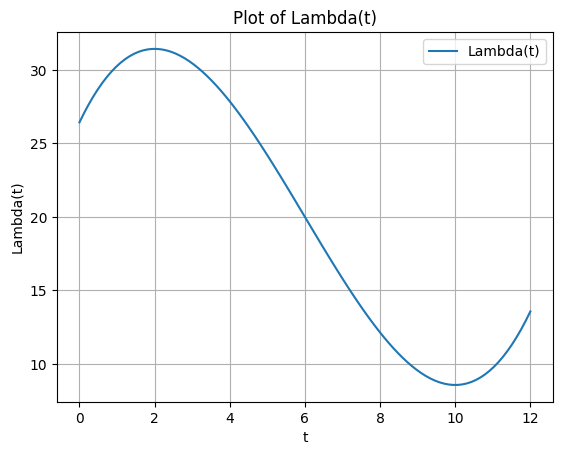

In [ ]:
# step 1, visualize the \lambda(t) curve to find the maximum point

def lambda_function(t):
    return (1/56) * (5*t**3 - 90*t**2 + 300*t + 1480)

t = np.linspace(0, 12, 100)
lambda_values = lambda_function(t)

plt.plot(t, lambda_values, label='Lambda(t)')
plt.xlabel('t')
plt.ylabel('Lambda(t)')
plt.title('Plot of Lambda(t)')
plt.grid(True)
plt.legend()
plt.show()


The maximum point is $t=2$. The corresponding $\lambda$ value is $\frac{220}{7}$. Then the procedure to simulate is as followed:

1.  Find $\lambda^* \geq \max_t \lambda(t)$.
2.  Start with $n=0$, $T = T_0 = 0$.
3.  Generate interarrival time $A \sim \exp(\lambda^*)$.  Set $T = T+A$.  
4.  Generate $U \sim Unif[0,1]$.  If $U \leq \lambda(T)/\lambda^*$, then the event has occurred, so set $n=n+1$, $T_{n+1} = T$.
5.  Repeat steps 3, 4 until we get to the end of our time interval.

In [ ]:
220/7

31.428571428571427

In [ ]:
def lambda_function(t):
    return (1/56) * (5*t**3 - 90*t**2 + 300*t + 1480)

def sim_pois(T, lamb):
  n = 0
  t = 0
  arrival_time = [0]
  while t < T:
    tmp = float(np.random.exponential(scale=1/lamb, size=1))
    t += tmp
    u = np.random.rand()
    if u <= lambda_function(t)/lamb:
      arrival_time.append(t)
      n += 1
  return n, arrival_time


#res = []
event = []
T = 12
lamb = 220/7
arrival = []
for i in range(500):
  tmp, arrival_time = sim_pois(T, lamb)
  arrival.append(arrival_time)
  event.append(tmp)


In [ ]:
# confidence interval for the probability
res = [int(i>250) for i in event]
sample_mean = np.mean(res)
sample_std = np.std(res, ddof=1)
sample_size = len(res)
lower_limit = sample_mean - 1.96 * (sample_std / np.sqrt(sample_size))
upper_limit = sample_mean + 1.96 * (sample_std / np.sqrt(sample_size))
print("Confidence Interval for the probability is:", (lower_limit, upper_limit))

Confidence Interval for the probability is: (0.2177076297934946, 0.29429237020650545)


___
**(c)** Based on your 500 replications, make a bar plot showing the average number of customers who arrive during each of the twelve hours of operation. Plot the rate function $\lambda(t)$ and compare.
___

## Ans.

In [ ]:
def classification_events(data):
  interval_counts = {f'{i}-{i+1}': 0 for i in range(12)}
  for item in data:
      for key in interval_counts.keys():
          start, end = map(float, key.split('-'))
          if start <= item < end:
              interval_counts[key] += 1
  return list(interval_counts.values())

In [ ]:
res = []
for i in range(500):
  res.append(classification_events(arrival[i]))
df = pd.DataFrame(res)
column_means = df.mean()
column_means = list(column_means)

Text(0, 0.5, 'Number of Arrivals')

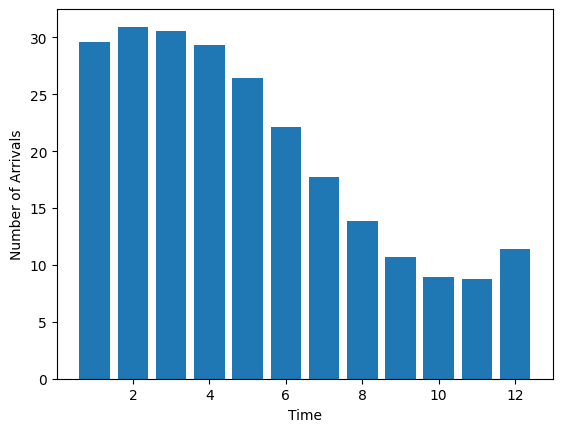

In [ ]:
categories =list(np.arange(1,13))
values = column_means
plt.bar(categories, values)
plt.xlabel('Time')
plt.ylabel('Number of Arrivals')




---
---


# Question 2: Putting my son to bed (30 points)

Sid uses a Spotify playlist with $n$ soothing songs to put his son to sleep. He plays the playlist on shuffle, but is worried that some songs may not get played (he spent a long time curating the playlist!).

___
**(a)**
Suppose Spotify truly picks a random song each time -- Sid wants to know how many songs it takes on average to play **every song** on his playlist. Build a simulator to estimate this for a different values of $n$, and use this to try and guess the function.

*Note: Try and pick a large range of $n$ to get a sense of the function of number of songs needed to play all vs. $n$ -- if you are adventurous, try to fit the function. Make sure you always show your CIs!*
___

## Ans.


In [13]:
def sim_song(N):
  results = []
  for _ in range(1000):
    song_li = []
    while len(set(song_li))< N:
      song_li.append(np.random.randint(1,N+1))
    results.append(len(song_li))
  return results

In [14]:
np.random.seed(10)
li = []
for i in range(1,101):
  li.append(sim_song(i))

In [15]:
song_num = np.zeros(len(li))
half_widths = np.zeros(len(li))
for i in range(len(li)):
    song_num[i] = np.mean(li[i])
    half_widths[i] = 1.96*(np.std(li[i])/np.sqrt(len(li[i])))

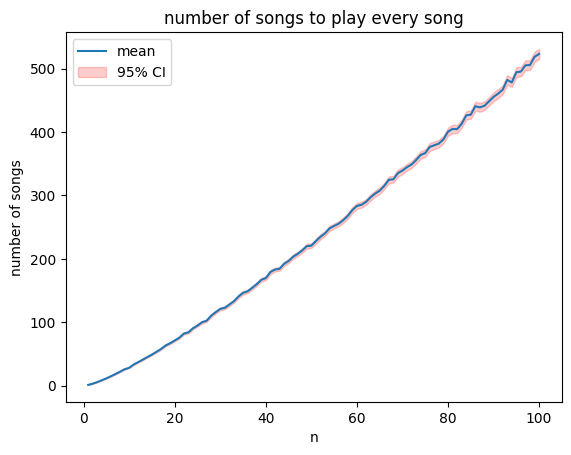

In [ ]:
plt.plot(np.arange(1,len(li)+1,1), song_num, label='mean')
plt.fill_between(np.arange(1,len(li)+1,1),song_num - half_widths,song_num + half_widths,alpha = 0.2,color='r',label='95% CI')
plt.xlabel("n")
plt.ylabel("number of songs")
plt.title("number of songs to play every song")
plt.legend()
plt.show()

Above plot shows that as n increases, the number of songs needed to play every song would proportionally increase, and the 95% confidence intervals would also have a larger scope (larger half width).

In [16]:
from scipy.optimize import curve_fit
def func(x, a, b,c):
  return a*x**b+c
popt, pcov = curve_fit(func, np.arange(1,len(li)+1,1), song_num)
print(popt)

[ 2.12667254  1.19553068 -3.76188436]


Above result indicates that we can use function $y=2x-4$ to fit the value, in which x is the length of playlist and y is the number of songs needed to play every song in the list.

Actually, the function for the average number of songs to play every song in his list could be obtained as $N(n) = n(1+\frac{1}{2}+\frac{2}{3}+...+\frac{1}{n})$. This could be obtained from the following derivation.

Denote $T_i=$ the time needed to play the i-th song after playing i-1 different songs.

After playing i-1 different songs, the probability that the next song is a new one is $P_{i}=\frac{n-(i-1)}{n}$.
Therefore, $T_i = 1/P_{i}=\frac{n}{n-i+1}$

Then our target time can be represented as

$T=T_1+T_2+...+T_n=\frac{n}{n}+\frac{n}{n-1}+\frac{n}{n-2}+...+\frac{n}{1}=n(1+\frac{1}{2}+\frac{1}{3}+...+\frac{1}{n})$

___

**(b)** On the other hand, Sid has realized that his son wakes up whenever he hears a song that has been played before (clever, isn't he!). Use your previous simulator to figure out how many songs Sid's son hears before he wakes up.

___

## Ans.



In [17]:
def sim_song_1(N):
  results = []
  for _ in range(1000):
    song_li = []
    while len(set(song_li)) == len(song_li):
      song_li.append(np.random.randint(1,N+1))
    results.append(len(song_li)-1)
  return results

In [18]:
np.random.seed(10)
np.mean(sim_song_1(10))

3.603

The simulation results show that if there are 10 songs in the playlist, then before Sid's son wakes up (which means before the first repetative song appears), he would have heard about 4 songs.

In [19]:
np.random.seed(10)
li = []
for i in range(1,101):
  li.append(sim_song_1(i))
song_num = np.zeros(len(li))
half_widths = np.zeros(len(li))
for i in range(len(li)):
    song_num[i] = np.mean(li[i])
    half_widths[i] = 1.96*(np.std(li[i])/np.sqrt(len(li[i])))

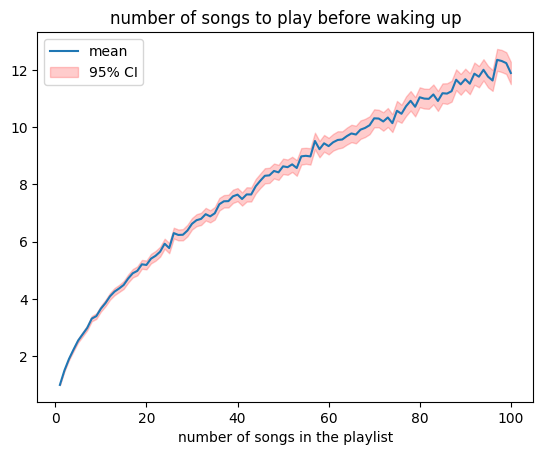

In [20]:
plt.plot(np.arange(1,len(li)+1,1), song_num, label='mean')
plt.fill_between(np.arange(1,len(li)+1,1),song_num - half_widths,song_num + half_widths,alpha = 0.2,color='r',label='95% CI')
plt.xlabel("number of songs in the playlist")
plt.title("number of songs to play before waking up")
plt.legend()
plt.show()

In [21]:
from scipy.optimize import curve_fit
def func(x, a, b,c):
  return a*x**b+c
popt, pcov = curve_fit(func, np.arange(1,len(li)+1,1), song_num)
print(popt)

[ 1.21156763  0.50542737 -0.21066288]


Above result implies that we can use function $y=\sqrt{x}-0.2$ to fit the value, in which x is the length of a playlist, y is the number of songs played before Sid's son wakes up.

___

**(c)** Suppose Spotify uses the following poor randomizer: it labels songs as $\{0,1,2,\ldots,n-1\}$, and after playing a song $i$, it then either plays song $(i+1) mod(n)$ or $(i-1)mod(n)$ with probability $1/2$ (i.e., the next or previous song, imagining the songs to be in a ring with $n-1$ wrapping around to $1$). Simulate this randomizer for $n=20$, assuming you always start at song $1$, and find the histogram of the **last song to be played** for the first time using this shuffler.   

___

## Ans.

In [ ]:
def spotify_song(N=20):

  results = []
  for _ in range(1000):
     s = 1
     song_li = []
     song_li.append(s)
     while len(set(song_li))< N:
       s = (np.random.choice([s-1,s+1])+ N)% N
       song_li.append(s)
     results.append(s)

  return results

Text(0.5, 1.0, 'Histogram of the last song to be played')

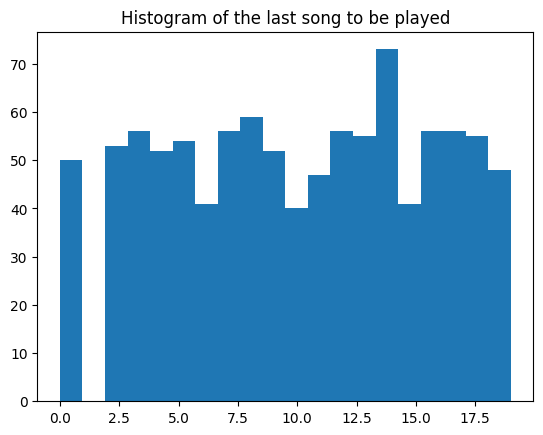

In [ ]:
np.random.seed(10)
y = spotify_song()
plt.hist(y, bins = 20)
plt.title("Histogram of the last song to be played")

___

**(d) (OPTIONAL)** For the above three questions, try and analytically derive the functions that you should get (and compare)

___
___

# Question 3: The gambler's ruin (20 points)

The gambler's ruin is one of the most famous and widely studied models in stochastic processes. Imagine two gamblers $A$ and $B$ are playing a tournament, where they each start with \$$a$ and \$$b$ initially, and play a sequence of games, where each game is won by either player with probability $1/2$, with the winner giving \$$1$ to the loser. Play goes on till one player runs out of money.

___

**(a)** Simulate this model to find the probability that player $A$ wins the overall tournament. Also, try and derive this analytically, and see how well the two match up.

___

## Ans.

In [ ]:
import random
def gambler_ruin_simulation(a, b):
  n = 0
  while a > 0 and b > 0:
      if random.random() < 0.5:
          a += 1
          b -= 1
      else:
          a -= 1
          b += 1
      n += 1
  return a > 0, n

num_simulations = 10000
initial_a = 30
initial_b = 10
player_a_wins = sum(gambler_ruin_simulation(initial_a, initial_b)[0] for _ in range(num_simulations))
probability_a_wins = player_a_wins / num_simulations
print(f"Probability that player A wins: {probability_a_wins}")

Probability that player A wins: 0.7434


For a single player A, the recurrent relationship is $P_{i} = \frac{1}{2}P_{i-1} + \frac{1}{2}P_{i+1}$. Therefore, $\frac{1}{2} (P_{i}-P_{i-1}) = \frac{1}{2} (P_{i+1}-P_{i})$. Also, we have $P_{0} = 0, P_{a+b} =1$. By this relationship, we can find $P_{2} = 2P_{1}$, $P_{3} = 3P_{1}$. Thus, $P_{a} = \frac{a}{a+b}$.

___
**(b)** Another question we can ask is how long it takes for the tournament to end. To study this, simulate the gambler's ruin for a range of values of $a$ and $b$, and use this to try and guess the expected time to ruin.

*Hint: Convince yourself that the function must be symmetric in $a$ and $b$, so you can assume $a\leq b$. Try plotting the expected absorption times for selected values of $a$, while varying $b$.*

___

## Ans.

In [ ]:
n = 100
res = []
for a in range(50,100,10):
  tmp = []
  for b in range(a, 100,10):
    time = 0
    for i in range(n):
      time += gambler_ruin_simulation(a, b)[1]
    tmp.append(time/n)
  res.append(tmp)


In [ ]:
df = pd.DataFrame(res)
df

,0,1,2,3,4
0,2295.50,3736.74,3039.80,4101.60,4430.8
1,3529.22,4321.78,4443.66,5547.52,NaN
2,5131.88,4983.68,6105.78,NaN,NaN
3,7133.46,5885.66,NaN,NaN,NaN
4,7780.66,NaN,NaN,NaN,NaN


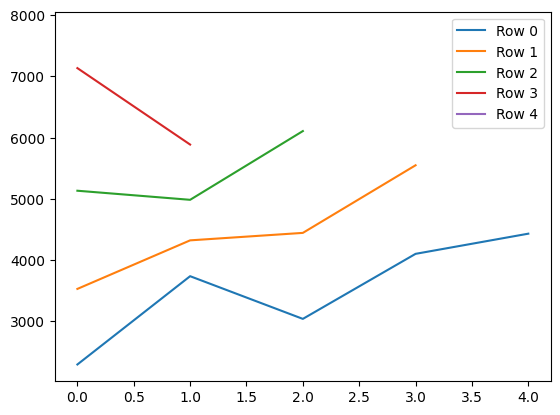

In [ ]:
for i in range(df.shape[0]):
    row_data = df.iloc[i].dropna().values
    if len(row_data) > 0:
        plt.plot(row_data, label=f'Row {i}')
plt.legend()

___
___

# Question 4: Simulation assigments take forever (25 points)

You are convinced that Simulation homeworks take the longest time compared to all other assignments, while Sid maintains that all assignment times are identically distributed. To decide this debate once and for all, you decide to record how long it takes you to do your assignment, and then survey your friends on how long it took them to do their last assignment until you find someone who took longer$\ldots$

___

**(a)**
Suppose Sid is right (!) and all assignment completion times are truly identically distributed. Formally suppose your own assignment takes time (in hours) distributed as $T_0\sim Exp(0.5)$, and similarly the $i^{th}$ friend you survey also takes time $T_i\sim Exp(0.5)$, independent of all other friends. Run 100 simulations and report a $95\%$ CI for the expected number of friends you need to survey to find someone who takes longer.
___


## Ans.


In [ ]:
#np.random.seed(10)
def sim_survey(N = 100):
  n_sim = N
  lambda_0 = 0.5
  survey_num = []
  for _ in range(n_sim):
    t_0 = np.random.exponential(1/lambda_0)
    t = -1
    n = 0
    while t <= t_0:
      t = np.random.exponential(1/lambda_0)
      n += 1
    survey_num.append(n)
  return survey_num

In [ ]:
survey_num = sim_survey()
estimate = np.mean(survey_num)
half_width = 1.96*np.std(survey_num)/np.sqrt(len(survey_num)-1)
ci = [estimate-half_width, estimate+half_width]
print("The expected number of friends needed to be surveyed is " + str(estimate))
print("The 95% CI for this estimation is " + str(ci))

The expected number of friends needed to be surveyed is 7.07
The 95% CI for this estimation is [1.2997882949063309, 12.840211705093669]


___

**(b)** You are concerned that the CI looks a little wide, so decide to do more replications to fix the problem. Repeat the above simulation with number of replications $n\in\{100,500,1000,1500,2000,2500,\ldots,9500,10000\}$, and plot the estimates and $95\%$ CIs.
___

## Ans.


In [ ]:
n = [100] + [i for i in range(500, 10001, 500)]
est = np.zeros(len(n))
half_width = np.zeros(len(n))
ci = []
for i in range(len(n)):
  sim = sim_survey(N = n[i])
  est[i] = np.mean(sim)
  half_width[i] = 1.96*(np.std(sim)/np.sqrt(len(sim)))
  ci.append((est[i]-half_width[i],est[i]+half_width[i]))

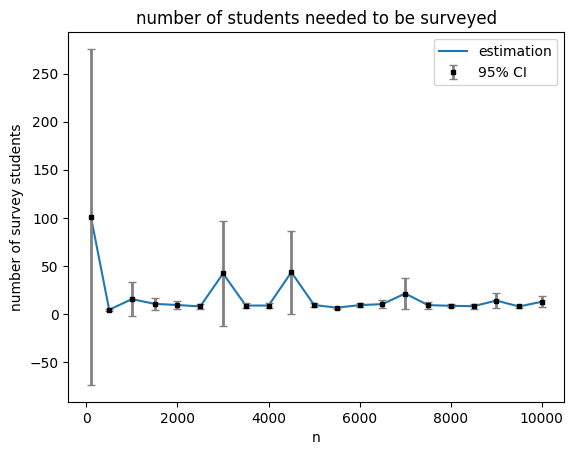

In [ ]:
plt.plot(n, est, label='estimation')
#plt.fill_between(n,est - half_width, est + half_width,alpha = 0.2,color='r',label='95% CI')
plt.errorbar(n, est, yerr=half_width, color='black', markersize = 3,
             linestyle="None", marker='s', capsize=3, ecolor='grey', elinewidth=2, label='95% CI')
plt.xlabel("n")
plt.ylabel("number of survey students")
plt.title("number of students needed to be surveyed")
plt.legend()
plt.show()

___
**(c)** Hopefully you found the previous part a little surprising(?) Why is that the case? Well, this question highlights an important aspect of simulation that we have taken for granted in past problems -- in order to get an estimator for an unknown quantity, we *need that quantity to be finite*! Find an expression for computing the expected number of queries till we get one which is larger in the above setting, and argue that it is infinite.

*Hint: Remember how we used linearity of expectation and indicator random variables before? Try doing the same, with indicator variables for the $i^{th}$ person (for each $i\in\{1,2,\ldots\}$) being the first person surveyed who took longer than you).*
___


## Ans.

For the i-th person, the probability that this student takes longer time than me is

$P(T_1 < T_0,T_2 < T_0, ..., T_{i-1} < T_0,T_i > T_0)=P(T_1 < T_0,T_2 < T_0, ..., T_{i-1} < T_0)-P(T_1 < T_0,T_2 < T_0, ..., T_{i-1} < T_0,T_i < T_0)=\frac{1}{i-1}-\frac{1}{i}$.

notice that the probability that the first student takes longer time than me is $\frac{1}{2}$

Therefore, if we limit the number of simulations to be n, the expected number of queries should have the expression:

$\sum\limits_{i=1}^n iP_i=\frac{1}{2}+\sum\limits_{i=2}^n i(\frac{1}{i-1}-\frac{1}{i})=\frac{1}{2}+\sum\limits_{i=2}^n (\frac{i}{i-1}-1)=\frac{1}{2}+\sum\limits_{i=1}^{n-1}\frac{1}{i}\approx\frac{1}{2}+log(n-1)$

As n goes to infinity, $log(n-1)$ will approach to infinity. Thus, the expectation value would go to infinity.